In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to python environment

In [2]:
#Read the data
data=pd.read_excel(r'C:\Users\Dell\Downloads\iris (1).xls')

In [3]:
#Displays the first five rows of the dataframe by default
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Check the diamension of dataset
data.shape

(150, 5)

In [5]:
#Prints information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Returns the number of missing values in each column
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
#Checking the datatype
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [8]:
#Fill the null values
for i in ['SL', 'SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [9]:
#again checking for the null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

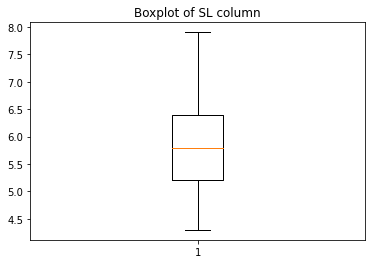

In [10]:
#Check for ouliers
plt.boxplot(data['SL'])
plt.title('Boxplot of SL column')
plt.show()

No outliers...

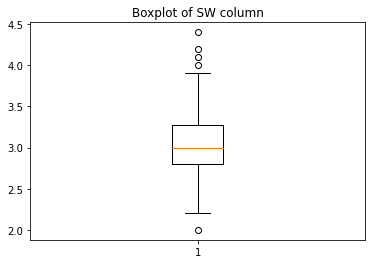

In [11]:
plt.boxplot(data['SW'])
plt.title('Boxplot of SW column')
plt.show()

5 outliers

In [12]:
#Finding 25,50,75 quartile
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [13]:
#print Q1,Q2,Q3
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [14]:
#Finding the median
data['SW'].median()

3.0

In [15]:
#Find IQR
IQR=Q3-Q1
IQR

0.4500000000000002

In [16]:
#Finding upper limit and lower limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [17]:
#Finding outliers using if condition and the values into a empty list
outlier = []
for x in data['SW']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [18]:
#print the outliers
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [19]:
ind=data['SW']>up_lim

In [20]:
#finding the location of outliers
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

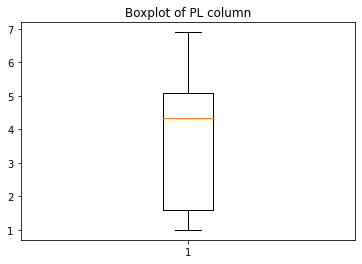

In [21]:
#Checking outliers using boxplot
plt.boxplot(data['PL'])
plt.title('Boxplot of PL column')
plt.show()

No outliers

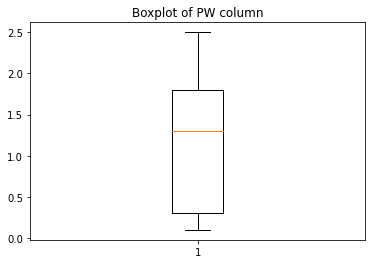

In [22]:
plt.boxplot(data['PW'])
plt.title('Boxplot of PW column')
plt.show()
#No outliers

In [23]:
#Checking the unique values
data['Classification'].nunique()

3

# Label Encoding

In [24]:
#importing library
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder=LabelEncoder()

In [26]:
#label encoding doing to column Classification
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [27]:
#print the data
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
#Setting features and target
y=data["Classification"]
X=data.drop('Classification',axis=1)

In [29]:
from sklearn.model_selection import train_test_split

# LogisticRegression model

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(X_train, y_train)
y_pred_logi = logistic_model.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#printing predicted values
y_pred_logi

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [34]:
#import library
from sklearn.metrics import confusion_matrix

In [35]:
#finding confusion matrix
confusion_matrix(y_test,y_pred_logi)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [36]:
#print y_test values
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int32

In [37]:
#import library
from sklearn.metrics import precision_score,recall_score

In [38]:
#finding precicion score
precision_score(y_test,y_pred_logi,average='micro')

1.0

In [39]:
#finding recall score
recall_score(y_test,y_pred_logi,average='micro')

1.0

In [40]:
#import library
from sklearn.metrics import accuracy_score

In [41]:
#finding accuracy score
accuracy_score(y_test,y_pred_logi)

1.0

# kNN model

In [42]:
#import library
from sklearn.neighbors import KNeighborsClassifier

In [43]:
#set number for k in the range 3 to 14.Finding the accuracy score for different values for k
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [44]:
#print the list
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

From this we get thart k=4,10,11,12 etc gets best value

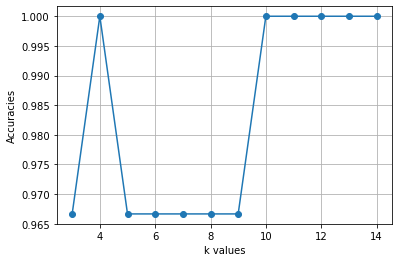

In [45]:
#Another method to find the accurate values.Plot graph
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [46]:
#Same steps above with k=4
classifier=KNeighborsClassifier(n_neighbors=4)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [47]:
#print accuracy score
accuracy_score(y_test,y_pred_kNN)

1.0

In [48]:
#print confusion matrix
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [49]:
#print precision score
precision_score(y_test,y_pred_kNN,average='micro')

1.0

# SVM Model

In [50]:
#import library
from sklearn.svm import SVC

In [51]:
#with linear keranal
svm_clf=SVC(kernel="linear")
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [52]:
#import library
from sklearn.metrics import confusion_matrix,accuracy_score

In [53]:
#print confusion matrix
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [54]:
#print accuracy score
accuracy_score(y_test,y_pred_svm)

1.0

In [55]:
#with Radial Basis Function (RBF)
svm_clf2=SVC(kernel="rbf")
svm_clf2=svm_clf2.fit(X_train,y_train)
y_pred_svm2=svm_clf2.predict(X_test)

In [56]:
#print confusion matrix
confusion_matrix(y_test,y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [57]:
#print accuracy score
accuracy_score(y_test,y_pred_svm2)

1.0

# Decision Tree  model

In [58]:
#import library
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [60]:
#print confusion matrix
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [61]:
#print accuracy score
accuracy_score(y_test,y_pred_dt)

1.0

# Random Forest 

In [62]:
#import library
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [64]:
#print confusion matrix
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [65]:
#print accuracy score
accuracy_score(y_test,y_pred_rf)

1.0

All the models get accuracy score 1. For this iris data set all the models gets best results.Here we are not used any scaling methods.Because accuracy score is obtaining at the best level.